In [1]:
%matplotlib inline
from call_file import call_file
from image_loader import load_image
from edge_detection import detect_edge
#from plot_edge import plot_edge
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
edges = None

In [3]:
def plot_edge(sigma):
    '''
    Plots original image and edge image next to each other.
    
    im = 2D array describing image - MUST BE A GLOBAL VARIABLE
    
    Arguments
    sigma

    Function which will be made interactive.
    '''

    edges = detect_edge(im,sigma)
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,11))
    ax_orig = axes[0]
    ax_edges = axes[1]
    ax_orig.imshow(im)
    ax_edges.imshow(edges)
    ax_edges.set_title('sigma = {}'.format(sigma))
    

In [4]:
file_path = call_file()
im = load_image(file_path)

<function __main__.plot_edge>

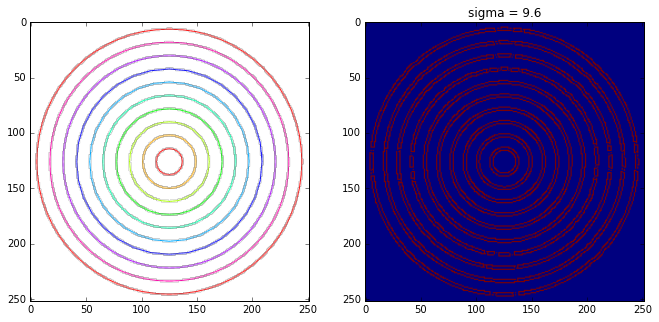

In [5]:
# no thrsholds
sigma_min, sigma_max, sigma_step = 0.1, 20, 0.5
interact(plot_edge,
         sigma=(sigma_min, sigma_max, sigma_step)
        )

### Input best sigma

In [6]:
best_sigma = 6

In [7]:
edges = detect_edge(im, best_sigma)

Pick a profile across edges image

In [8]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from image_loader import load_image
from edge_detection import detect_edge
import os.path as pth

# Begin plotting in pop out window
%matplotlib qt

# Find nearest array value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    
    print('x = %d, y = %d' % (ix, iy))

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


# Take edges from earlier...
z = edges

# Plot this image inline
fig = plt.figure()
axes = fig.add_subplot(111)
axes.imshow(z)
axes.axis('image')
axes.set_title('Binary edges image')

plt.show()

# Call click function to select profile:
coords = [] # initialise array to store picked coords

print("Picked coordinates:")

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Picked coordinates:
x = 206, y = 31
x = 34, y = 230

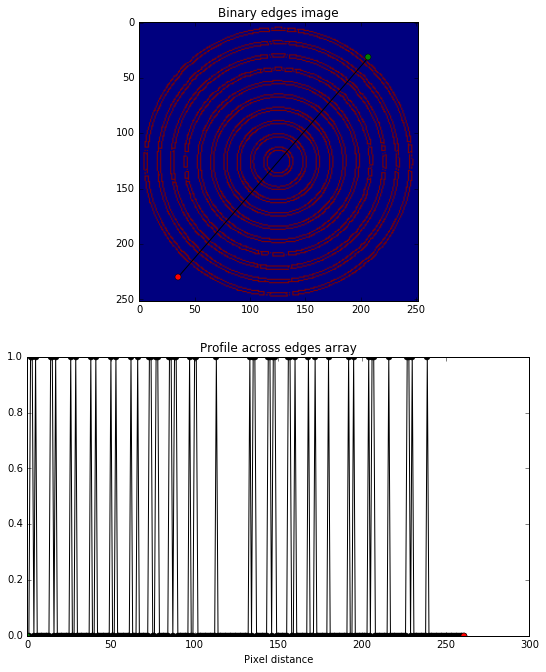

In [9]:
# Extract the profile as nearest-neighbour pixel values
x0 = coords[0][0]
x1 = coords[1][0]
y0 = coords[0][1]
y1 = coords[1][1]

length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)
profile = z[x.astype(np.int), y.astype(np.int)]


# Switch to plotting inline
%matplotlib inline

# Plot to show where the profile is and the profile values
fig, axes = plt.subplots(nrows=2, figsize=(9,11))
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'k-')
axes[0].plot(x0, y0, 'go')
axes[0].plot(x1, y1, 'ro')
axes[0].axis('image')
axes[0].set_title('Binary edges image')

axes[1].plot(profile,'ko-')
axes[1].plot(0,profile[0],'go')
axes[1].plot(len(profile)-1,profile[-1],'ro')
axes[1].set_title('Profile across edges array')
axes[1].set_xlabel('Pixel distance')